# Business Understanding

About Dataset: Dataset contains information about flight booking options from the website Easemytrip for flight travel between 
India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

Objective: The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to 
conduct various statistical hypothesis tests in order to get meaningful information from it.'Easemytrip' is an internet platform
for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will 
aid in the discovery of valuable insights that will be of enormous value to passengers.

In [88]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

In [60]:
df1=pd.read_csv("Clean_Dataset.csv")
df1.shape
df1.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [62]:
df2=df1.drop(columns="Unnamed: 0",axis=1)
df2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [63]:
df=df2.drop(index=range(20001,300153),axis=0)

In [64]:
df.shape

(20001, 11)

In [65]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA

In [66]:
df.shape

(20001, 11)

In [67]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20001 non-null  object 
 1   flight            20001 non-null  object 
 2   source_city       20001 non-null  object 
 3   departure_time    20001 non-null  object 
 4   stops             20001 non-null  object 
 5   arrival_time      20001 non-null  object 
 6   destination_city  20001 non-null  object 
 7   class             20001 non-null  object 
 8   duration          20001 non-null  float64
 9   days_left         20001 non-null  int64  
 10  price             20001 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [69]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [70]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.057518,0.246261
days_left,-0.057518,1.000000,-0.580471
price,0.246261,-0.580471,1.000000


In [71]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [72]:
df["flight"].value_counts()

UK-819     235
UK-945     232
UK-995     227
UK-993     223
UK-879     211
          ... 
AI-437       1
G8-107       1
UK-671       1
SG-8480      1
6E-2914      1
Name: flight, Length: 361, dtype: int64

In [73]:
df["departure_time"].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [74]:
df["class"].unique()

array(['Economy'], dtype=object)

<AxesSubplot:>

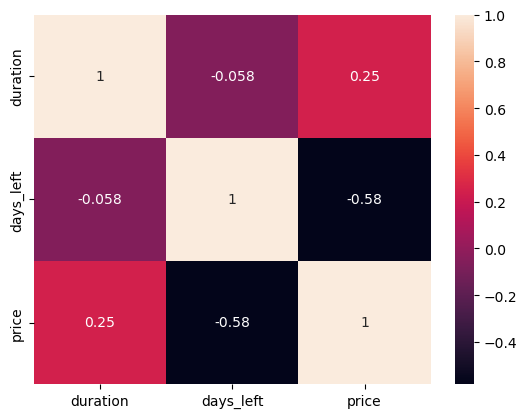

In [75]:
sns.heatmap(data=df.corr(),annot=True)

In [76]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<AxesSubplot:xlabel='departure_time', ylabel='duration'>

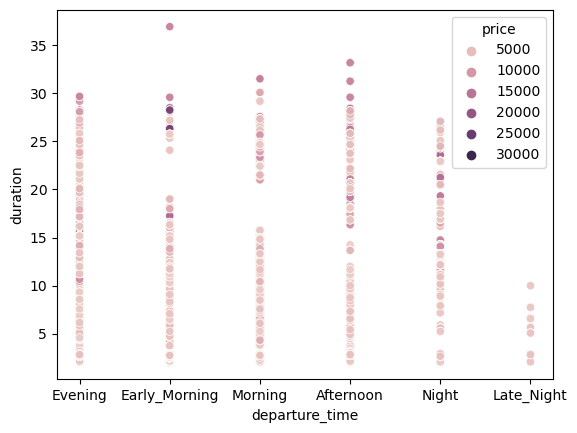

In [77]:
sns.scatterplot(x="departure_time",y="duration",data=df,hue="price")

<AxesSubplot:xlabel='airline', ylabel='days_left'>

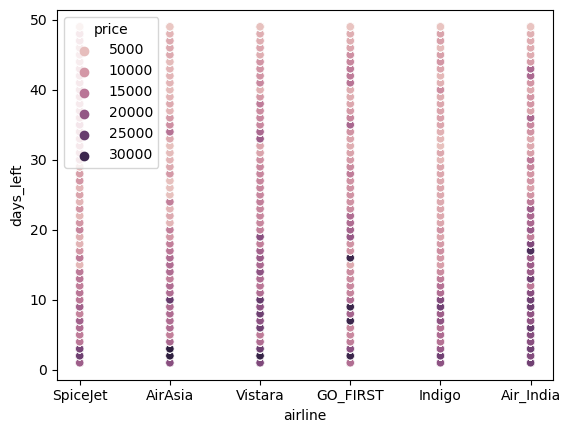

In [78]:
sns.scatterplot(x="airline",y="days_left",data=df,hue="price")

Create x and y

In [79]:
x=pd.get_dummies(df.drop("price",axis=1),drop_first=True)
y=df["price"]

TTS

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# creating pipelines

In [81]:
LinearRegressionPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("logistic regression",LinearRegression())])

KNNPipeline=Pipeline([("knn",KNeighborsRegressor())])

SVRPipeline=Pipeline([("svc",SVR())])

DTPipeline=Pipeline([("DT",DecisionTreeRegressor())])

RFPipeline=Pipeline([("RF",RandomForestRegressor())])

AdaboostPipeline=Pipeline([("Adaboost",AdaBoostRegressor())])

GradientPipeline=Pipeline([("Gradient",GradientBoostingRegressor())])

# Modelling

Defining pipeline in a list

In [82]:
mypipeline=[LinearRegressionPipeline,KNNPipeline,SVRPipeline,DTPipeline,RFPipeline,AdaboostPipeline,GradientPipeline]

Fitting the pipeline

In [83]:
for mypipe in mypipeline:
    mypipe.fit(x_train,y_train)

Creating Dictionary of pipelines

In [84]:
pipelinedict={0:"Linear Regression",1:"KNN", 2:"SVR", 3:"DT", 4:"RF", 5:"Ada", 6:"Gradient"}

Getting test accuracy for all models

In [85]:
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(pipelinedict[i],model.score(x_test,y_test)))

Linear Regression Test Accuracy: 0.021227391502119497
KNN Test Accuracy: 0.7441518502972055
SVR Test Accuracy: 0.1680413538133112
DT Test Accuracy: 0.7741377088514323
RF Test Accuracy: 0.8481969333883402
Ada Test Accuracy: 0.3681720057318598
Gradient Test Accuracy: 0.7376311633025241


From the above accuracies, we choose the model with highest accuracy i.e RandomForest.

# Hyper Parameter Tuning

In [86]:
estimator=RandomForestRegressor()
paramgrid={"n_estimators":[5,10,20]}
hpmodel=GridSearchCV(estimator,paramgrid,cv=5,scoring="accuracy")
hpmodel.fit(x_train,y_train)
hpmodel.best_params_

{'n_estimators': 5}

# Rebuilding the Final Model

In [91]:
finalmodel=RandomForestRegressor(n_estimators=5)
finalmodel.fit(x_train,y_train)
ypredtrain=finalmodel.predict(x_train)
ypredtest=finalmodel.predict(x_test)

#Evaluation
print("Train score:",finalmodel.score(x_train,y_train))
print("Test score:",finalmodel.score(x_test,y_test))

Train score: 0.9650786730997833
Test score: 0.8349188162276451
